# <span style='color:BLUE'> BIOVID Pain Data </span>

In [1]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
cwd

from numpy import mean
from numpy import std
import pycatch22
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

/Users/burcuozek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Defining all the conditions inside a function
def condition(x):
    if x == 'BL1':
        return 0
    elif x == 'PA1':
        return 1
    elif x == 'PA2':
        return 2
    elif x == 'PA3':
        return 3
    else:
        return 4

### <span style='color:red'> Read Subject Names </span>

In [2]:
#Change the directory
directory_read_names = ''
samples = pd.read_csv (directory_read_names + 'samples_people.csv',sep='\t')


In [3]:
print('how many subjects')
print(samples.subject_id.nunique())
print('subjects')
print(samples.subject_id.unique())
#######
print('how many subject names')
print(samples.subject_name.nunique())
print('subjects names')
print(samples.subject_name.unique())
#######
print('how many class')
print(samples.class_id.nunique())
print(samples.class_id.unique())
#######
print('how many class name')
print(samples.class_name.unique())
print(samples.class_name.nunique())
#######
print('how many samples')
print(samples.sample_id.unique())
print(samples.sample_id.nunique())
print(samples.sample_name.unique())
print(samples.sample_name.nunique())
from scipy.stats import zscore
# print(samples[('subject_name','subject_id')].unique())
# np.unique(samples[['subject_id', 'subject_name']])
# print(samples.subject_name.nunique())
# print(np.unique(samples[['subject_id', 'subject_name']].values))
# pd.concat([samples['subject_id'],samples['subject_name']]).unique()

In [4]:
samples_id_1 = samples[samples['subject_id'] == 1]
display(samples_id_1)
print(samples_id_1.subject_id.unique())
print(samples_id_1.subject_id.nunique())
print(samples_id_1.subject_name.unique())
print(samples_id_1.subject_name.nunique())
print(samples_id_1.class_id.unique())
print(samples_id_1.class_id.nunique())
print(samples_id_1.sample_id.unique())
print(samples_id_1.sample_id.nunique())
print(samples_id_1.sample_name.unique())
print(samples_id_1.sample_name.nunique())

### <span style='color:red'> Read all subjects seperately </span>

In [5]:
subjectnames_list = samples.subject_name.unique()

for subject_id in range(1,88): 
    subject_name = subjectnames_list[subject_id-1]
    print('number' ,subject_id, 'subject name',subject_name)
    df = pd.read_excel('/Users/burcuozek/Desktop/Prediction Interval Work/Prediction Interval/code/EachSubject_Data_MinMax/'+ subject_name +'_minmax.xlsx')
    df = df.drop(['Unnamed: 0'], axis=1)
#     print(df.shape)

    
    df_subject_vector = df.groupby('Pain_Regression_Level').agg({ 'DN_OutlierInclude_p_001_mdrmd':'mean',
                                       'DN_OutlierInclude_n_001_mdrmd':'mean','CO_Embed2_Dist_tau_d_expfit_meandiff':'mean' }).reset_index()

    df_subject_vector = df_subject_vector.drop(['Pain_Regression_Level'], axis=1)
    subject_vector = np.transpose(df_subject_vector.values).reshape(1,5*3)
#     print(subject_vector.shape)
   
    if subject_id == 1:
        all_subjects_vectors = pd.DataFrame(subject_vector)

    else:
        df_temp = pd.DataFrame(subject_vector)

        all_subjects_vectors = all_subjects_vectors.append(df_temp)

        
display(all_subjects_vectors)

In [9]:
number_clusters = 4
kmeans = KMeans(
    init="random",
    n_clusters=number_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(all_subjects_vectors)
clusters = kmeans.labels_
# all_subjects_vectors['Clusters'] = clusters[:].reshape(len(clusters),1)
# all_subjects_vectors

In [11]:
from scipy.spatial.distance import cdist

matrix = np.array(all_subjects_vectors)
# Perform k-means clustering with 4 clusters
# kmeans = KMeans(n_clusters=4, random_state=0).fit(matrix)

kmeans = KMeans(
    init="random",
    n_clusters=number_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(all_subjects_vectors)
labels = kmeans.labels_

In [13]:
# Calculate the Euclidean distance within each cluster
distances = []
for label in np.unique(labels):
    mask = labels == label
    cluster_indices = np.where(mask)[0]
    cluster = matrix[cluster_indices, :]
    pairwise_distances = cdist(cluster, cluster, metric='euclidean')
    average_pairwise_distance = np.mean(pairwise_distances)
    distances.append(average_pairwise_distance)

# Print the average pairwise distances for each cluster
print("Average pairwise distances:", distances)

Average pairwise distances: [0.44980766536136096, 0.461973582916587, 0.48705964241276406, 0.5133359386026358]


In [16]:
# Calculate distances within each cluster
distances = []
for label in np.unique(labels):
    mask = labels == label
    cluster = matrix[mask, :]
    distances.append(cdist(cluster, cluster, metric='euclidean'))


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Calculate distances within each cluster
distances = []
for label in np.unique(labels):
    mask = labels == label
    cluster = matrix[mask, :]
    distances.append(cdist(cluster, cluster, metric='euclidean'))


In [18]:
c1 = distances[0].flatten()
df = pd.DataFrame(c1 , columns = ['Pairwise (Euclidean) Distance'])
df['Cluster'] = "Cluster 1     Avg Dist = 0.44"
print(df.shape)

c2 = distances[1].flatten()
df2 = pd.DataFrame(c2 , columns = ['Pairwise (Euclidean) Distance'])
df2['Cluster'] = "Cluster 2     Avg Dist = 0.46"
print(df2.shape)

c3 = distances[2].flatten()
df3 = pd.DataFrame(c3 , columns = ['Pairwise (Euclidean) Distance'])
df3['Cluster'] = "Cluster 3     Avg Dist = 0.48"
print(df3.shape)

c4 = distances[3].flatten()
df4 = pd.DataFrame(c4 , columns = ['Pairwise (Euclidean) Distance'])
df4['Cluster'] = "Cluster 4     Avg Dist = 0.51"
print(df4.shape)

(256, 2)
(400, 2)
(676, 2)
(625, 2)


In [19]:
results = pd.concat([df, df2,df3,df4] ,axis=0)

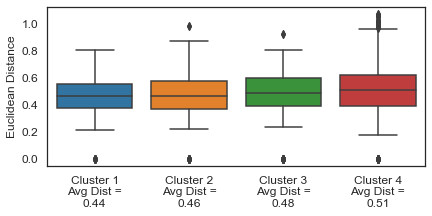

In [21]:
import textwrap
import seaborn as sns
import matplotlib.pyplot as plt

desired_dpi = 600
# desired_width_px = 4000
# desired_height_px = 5249



# Width: 789 – 2250 pixels (at 300 dpi). Height maximum: 2625 pixels (at 300 dpi).



desired_dpi = 300
# desired_width_px = 4000
# desired_height_px = 5249

# desired_width_px = 2250
# desired_height_px = 2625

desired_width_px = 1849
desired_height_px = 2325


# desired_width_px = 3000
# desired_height_px = 4449

fig_width = desired_width_px / desired_dpi
fig_height = desired_height_px / (desired_dpi * 2.45)

# Set the figsize parameter when creating the figure
plt.figure(figsize=(fig_width, fig_height))

sns.set(style="white",rc={"font.size": 12}, color_codes=True)
# colors = ["#F16C5E", "#FF8C87", "#FBB4AE", "#FDE2E2"]

colors = sns.color_palette("tab10")

# sns.set(style="white", font_scale=1.3, rc={"font.size": 14}, color_codes=True)
# sns.set_palette(colors)



ax = sns.boxplot(data=results, x="Cluster", y="Pairwise (Euclidean) Distance", palette=colors)

max_width = 11
ax.set_xticklabels([textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()], fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Adjust the font size directly for the y-axis label
ax.set_ylabel("Euclidean Distance", fontsize=12)  # Adjust the fontsize value as needed



ax.set_xlabel("")

plt.tight_layout()
plt.savefig('distance_boxplots_Mar29.tif', dpi=desired_dpi,  format="tif",facecolor='white',pil_kwargs={"compression": "tiff_lzw"})
# plt.savefig('distance_boxplots_Nov21.png', dpi=600)
plt.show()
